In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df= pd.read_csv("standardscaler_2.csv")
df.head()

,Experience_Years,Age,Education_Level,Hours_Per_Week,Salary
0,5.99,34.63,3,41.12,87638.54
1,4.72,39.55,4,46.82,84956.80
2,6.30,23.01,1,40.63,73501.52
3,8.05,32.81,4,37.85,100707.27
4,4.53,26.75,3,40.61,80094.46


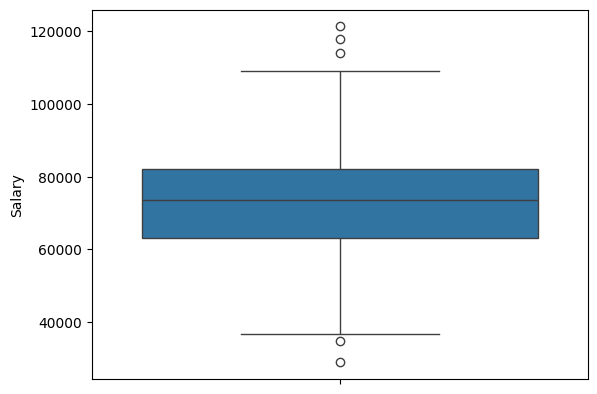

In [293]:
sns.boxplot(df["Salary"])
plt.show()


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_Years  500 non-null    float64
 1   Age               500 non-null    float64
 2   Education_Level   500 non-null    int64  
 3   Hours_Per_Week    500 non-null    float64
 4   Salary            500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [267]:
x=df.drop(columns="Salary", axis=1)
y=df["Salary"]

In [268]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = 0.8,random_state=42)

In [269]:
ytest.mean()

np.float64(72999.18479999999)

In [270]:
model = LinearRegression()

In [271]:
model.fit(xtrain,ytrain)  # model training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [272]:
y_predicted = model.predict(xtest)

In [273]:
ytrain_predicted = model.predict(xtrain)

In [274]:
model.coef_ #slope value

array([4202.9561495 ,  144.39478967, 4927.27044829,  142.90100371])

In [275]:
model.intercept_  # base value

np.float64(29644.983106864413)

In [276]:
df.corr()

,Experience_Years,Age,Education_Level,Hours_Per_Week,Salary
Experience_Years,1.000000,-0.073255,-0.071472,0.060724,0.514034
Age,-0.073255,1.000000,-0.004516,0.047329,-0.010178
Education_Level,-0.071472,-0.004516,1.000000,0.006592,0.323822
Hours_Per_Week,0.060724,0.047329,0.006592,1.000000,0.083765
Salary,0.514034,-0.010178,0.323822,0.083765,1.000000


In [277]:
targeted_mean=ytest.mean()
targeted_mean

np.float64(72999.18479999999)

In [278]:
predicted_test=model.predict(xtest)
# predicted_test

In [279]:
predicted_train=model.predict(xtrain)
# predicted_train

In [280]:
#r2score
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

r2Score for the train

In [281]:
r2_score(ytrain,ytrain_predicted) # 40%

0.4049766661502865

R2score for the Test

In [282]:
r2_score(ytest,y_predicted)  #36%

0.36362143647183787

> Underfit coz tarin_score = 40 and test_score = 36

STANDARDSCALAR

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
scaler = StandardScaler()

#standardizing the values

In [285]:
xtrain_scaled = scaler.fit_transform(xtrain)
xtrain_scaled

array([[ 0.4101165 , -1.48786319, -1.33860046,  0.52585485],
       [ 0.73171644, -2.31816681,  0.46119848, -0.90974838],
       [-1.44291174,  0.77450449,  1.36109795,  0.21707985],
       ...,
       [-0.73845473, -0.68272029, -1.33860046, -1.06213085],
       [ 0.07320227, -0.5401429 , -1.33860046,  0.97097205],
       [-0.35559765,  0.89821134,  1.36109795, -0.7313005 ]],
      shape=(400, 4))

In [286]:
xtest_scaled = scaler.transform(xtest)
xtest_scaled

array([[ 1.56379248, -1.60318314, -0.43870099, -0.33430407],
       [ 1.59442105, -0.2445045 , -1.33860046,  0.54991524],
       [ 2.19678285, -0.04950895, -1.33860046,  0.23312011],
       [-0.73334996,  0.04903719, -1.33860046,  0.70029267],
       [-0.16672149,  0.42015774,  1.36109795, -0.23605748],
       [ 1.20135445,  1.43497327, -0.43870099,  0.37547741],
       [ 0.18550701,  0.22096874, -1.33860046, -0.09771024],
       [ 0.59388789,  1.65722626, -0.43870099, -0.1317958 ],
       [ 0.36417365, -1.97430369, -0.43870099, -0.17390148],
       [-0.06973104, -0.26756849, -1.33860046,  1.12936961],
       [ 0.55304981, -0.88400602, -1.33860046, -0.7252854 ],
       [ 0.17529749,  0.60886311, -0.43870099,  1.95744801],
       [-1.09578799, -1.43963849, -0.43870099, -0.54483248],
       [-0.83034042,  0.17693749, -1.33860046,  0.64816183],
       [ 0.50710696, -0.8504584 , -0.43870099, -0.59295326],
       [ 0.96653545,  0.60466966, -1.33860046,  0.1148232 ],
       [ 0.54794504, -0.

In [287]:
model = LinearRegression()

In [288]:
model.fit(xtrain_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [289]:
model.coef_ 

array([8233.40437537,  688.66780374, 5475.35654004,  712.71167675])

slope values after model training - array([4202.9561495 ,  144.39478967, 4927.27044829,  142.90100371])      
slope values after standard scalar - array([8233.40437537,  688.66780374, 5475.35654004,  712.71167675])

In [290]:
model.score(xtrain_scaled,ytrain)

0.4049766661502865

In [291]:
model.score(xtest_scaled,ytest)

0.36362143647183764